In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras import layers, models


Documentation:

Dataset:
The dataset contains images of handwritten digits with 785 columns (784 pixel values + 1 label).
Target : Digits from 1 - 9

Models Implemented:
Logistic Regression (linear)
SVM (non-linear)
CNN (non-linear)


Data Preprocessing:

The data was standardized before training the models.
Specifically for the CNN, the data was reshaped to fit the CNN input requirements and normalized.

Evaluation Metrics:
The performance of each model was evaluated using accuracy, classification report, and confusion matrix.



In [6]:
# Load the dataset
data = pd.read_csv('train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Describe the dataset
print("Dataset Description:")
print(f"Shape: {data.shape}")


Dataset Description:
Shape: (42000, 785)


In [8]:
# Split the data into features and target
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Model 1: Logistic Regression (Linear Model)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_acc = accuracy_score(y_test, logistic_pred)
print(f"Logistic Regression Accuracy: {logistic_acc}")

Logistic Regression Accuracy: 0.9063095238095238


In [10]:
# Model 2: Support Vector Machine (Non-Linear Model)
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_acc}")

SVM Accuracy: 0.958452380952381


In [11]:
# Reshape data to fit the CNN input requirements
X = X.values.reshape(-1, 28, 28, 1)  # Use .values if X is a DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Model 3: Convolutional Neural Network (Non-Linear Model)
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Predict using the CNN model
cnn_pred = np.argmax(cnn_model.predict(X_test), axis=1)

# Calculate accuracy
cnn_acc = accuracy_score(y_test, cnn_pred)
print(f"CNN Accuracy: {cnn_acc}")

c:\Users\anand\Anaconda3\envs\akr\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.7978 - loss: 0.6789 - val_accuracy: 0.9662 - val_loss: 0.1144
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9710 - loss: 0.0912 - val_accuracy: 0.9714 - val_loss: 0.0951
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9829 - loss: 0.0514 - val_accuracy: 0.9818 - val_loss: 0.0613
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9859 - loss: 0.0447 - val_accuracy: 0.9868 - val_loss: 0.0487
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9902 - loss: 0.0291 - val_accuracy: 0.9836 - val_loss: 0.0537
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9915 - loss: 0.0260 - val_accuracy: 0.9869 - val_loss: 0.0469
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9945 - loss: 0.0171 - val_accuracy: 0.9876 - val_loss: 0.0472
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9948 - loss: 0.0158 - val_a

In [12]:
# Evaluate the models
print("Logistic Regression Report:")
print(classification_report(y_test, logistic_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, logistic_pred))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       816
           1       0.95      0.97      0.96       909
           2       0.89      0.86      0.88       846
           3       0.90      0.86      0.88       937
           4       0.91      0.90      0.91       839
           5       0.85      0.86      0.85       702
           6       0.91      0.94      0.92       785
           7       0.93      0.92      0.92       893
           8       0.89      0.88      0.89       835
           9       0.89      0.90      0.90       838

    accuracy                           0.91      8400
   macro avg       0.90      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400

Confusion Matrix:
[[777   0   2   2   1  16  14   2   2   0]
 [  0 886   7   1   1   2   1   2   8   1]
 [  8  18 729  12  14   9  13  14  25   4]
 [  3   2  31 809   3  34   6   9  24  16]
 [  6   3   8   1 759  

In [13]:
print("SVM Report:")
print(classification_report(y_test, svm_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))

SVM Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.98      0.98       909
           2       0.91      0.97      0.94       846
           3       0.95      0.94      0.95       937
           4       0.97      0.96      0.97       839
           5       0.95      0.94      0.95       702
           6       0.96      0.97      0.96       785
           7       0.96      0.96      0.96       893
           8       0.96      0.94      0.95       835
           9       0.96      0.93      0.95       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Confusion Matrix:
[[801   0   3   0   1   3   7   0   1   0]
 [  0 892   8   1   1   1   1   2   2   1]
 [  2   6 820   3   4   0   4   2   5   0]
 [  1   3  11 885   0  11   0   9  12   5]
 [  1   0  11   0 805   1   5   4   0  

In [14]:
print("CN Report:")
print(classification_report(y_test, cnn_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, cnn_pred))

CN Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       816
           1       0.99      1.00      0.99       909
           2       1.00      0.98      0.99       846
           3       1.00      0.99      0.99       937
           4       0.99      0.99      0.99       839
           5       0.98      0.99      0.99       702
           6       0.99      0.99      0.99       785
           7       0.99      0.99      0.99       893
           8       0.99      0.98      0.99       835
           9       0.99      0.99      0.99       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400

Confusion Matrix:
[[813   0   1   0   0   0   1   0   0   1]
 [  0 908   0   0   0   0   1   0   0   0]
 [  0   4 829   1   3   0   0   7   2   0]
 [  0   0   1 926   0   4   0   2   3   1]
 [  2   0   0   0 830   0   4   1   0   

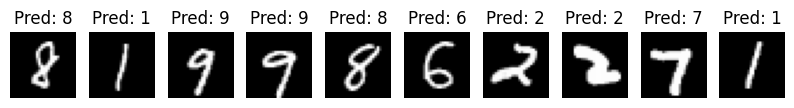

In [15]:
# Plotting some of the digits and their predictions
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i in range(10):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Pred: {cnn_pred[i]}")
    axes[i].axis('off')
plt.show()


"""

Comments:

Logistic Regression Accuracy: 0.9063
SVM Accuracy: 0.9585
CNN Accuracy: 0.9894

Results:

The CNN performed the best among the three models with an accuracy of 0.9894.
The SVM also performed well, with slightly lower accuracy at 0.9585.
The Logistic Regression had the lowest accuracy at 0.9063 but still provided reasonable results.

"""

## Save the CNN model

In [ ]:
# Save the trained model
cnn_model.save('cnn_model.h5')

## Testing

In [20]:
test_data = pd.read_csv('test.csv')
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


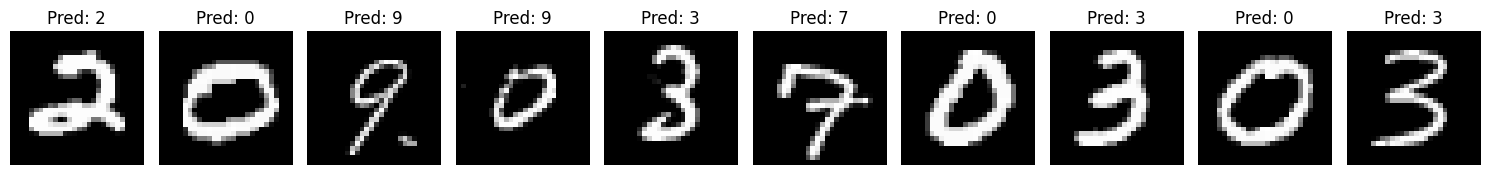

In [21]:

# Preprocess the test data
# Reshape data to fit the CNN input requirements
X_test = test_data.values.reshape(-1, 28, 28, 1)

# Normalize the data
X_test = X_test.astype('float32') / 255

# 2. Predict using the CNN model
cnn_pred = np.argmax(cnn_model.predict(X_test), axis=1)

# Visualize the predictions
fig, axes = plt.subplots(1, 10, figsize=(15, 5))  # Adjust figsize as needed
for i in range(10):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Pred: {cnn_pred[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()